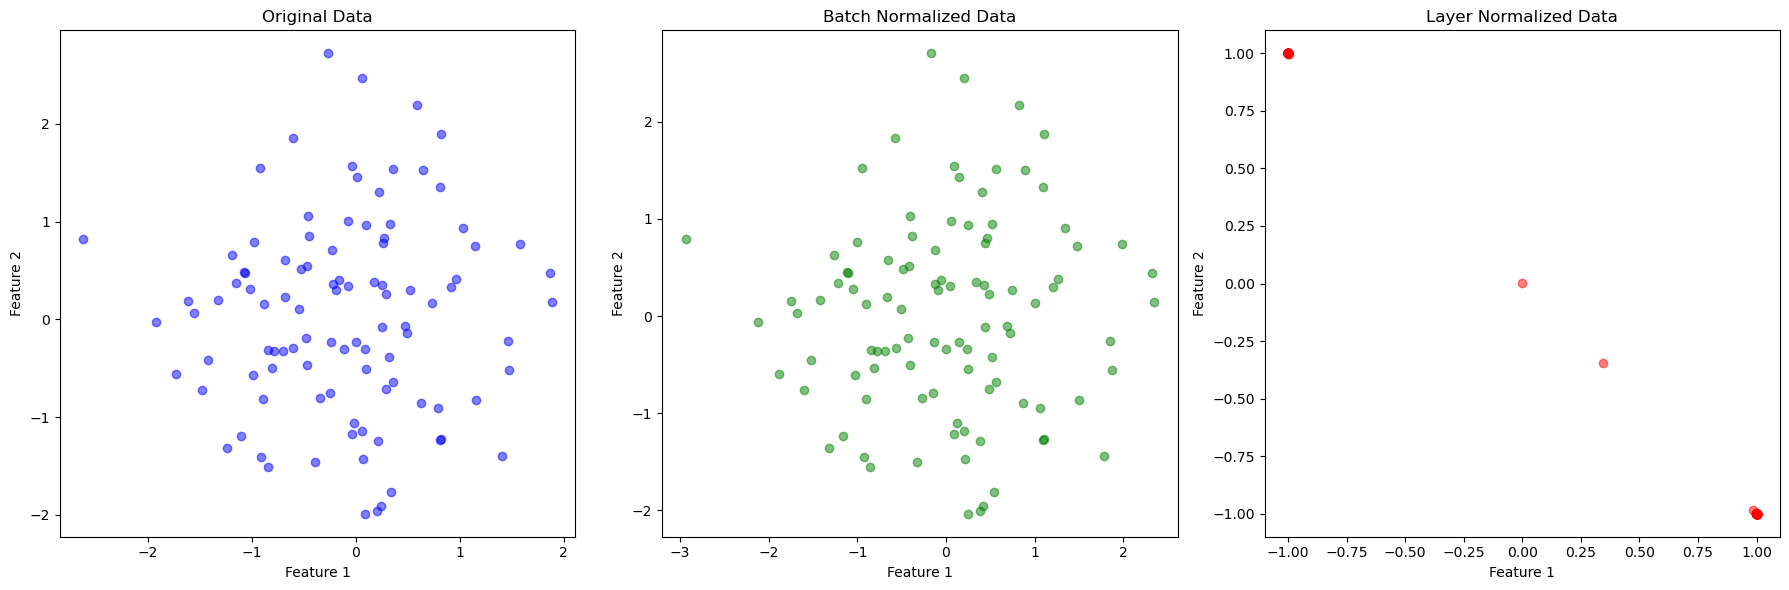

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (batch of samples)
np.random.seed(42)
data = np.random.randn(100, 2)  # 100 samples, 2 features

# BatchNorm: normalize across the batch
def batchnorm(data, gamma=1, beta=0, epsilon=1e-5):
    batch_mean = np.mean(data, axis=0)
    batch_var = np.var(data, axis=0)
    normalized_data = (data - batch_mean) / np.sqrt(batch_var + epsilon)
    return gamma * normalized_data + beta

# LayerNorm: normalize across the features for each sample
def layernorm(data, gamma=1, beta=0, epsilon=1e-5):
    layer_mean = np.mean(data, axis=1, keepdims=True)
    layer_var = np.var(data, axis=1, keepdims=True)
    normalized_data = (data - layer_mean) / np.sqrt(layer_var + epsilon)
    return gamma * normalized_data + beta

# Apply BatchNorm and LayerNorm
data_batchnorm = batchnorm(data)
data_layernorm = layernorm(data)

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original Data
ax[0].scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Batch Normalized Data
ax[1].scatter(data_batchnorm[:, 0], data_batchnorm[:, 1], color='green', alpha=0.5)
ax[1].set_title('Batch Normalized Data')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

# Layer Normalized Data
ax[2].scatter(data_layernorm[:, 0], data_layernorm[:, 1], color='red', alpha=0.5)
ax[2].set_title('Layer Normalized Data')
ax[2].set_xlabel('Feature 1')
ax[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn

class LayerNorm(nn.Module):
    def __init__(self, d_model, eps=1e-12):
        super(LayerNorm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(d_model))
        self.beta = nn.Parameter(torch.zeros(d_model))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        var = x.var(-1, unbiased=False, keepdim=True)
        out = (x - mean) / torch.sqrt(var + self.eps)
        out = self.gamma * out + self.beta
        return out